In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Names = ["class", "Alcohol",
 	 "Malic acid",
 	 "Ash",
	 "Alcalinity of ash",  
 	 "Magnesium",
	 "Total phenols",
 	 "Flavanoids",
 	 "Nonflavanoid phenols",
 	 "Proanthocyanins",
	 "Color intensity",
 	 "Hue",
 	 "OD280/OD315 of diluted wines",
 	 "Proline"   ]
df = pd.read_csv("wine.data",names = Names)
df

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [80]:
df.skew(axis=0)

class                           0.107431
Alcohol                        -0.051482
Malic acid                      1.039651
Ash                            -0.176699
Alcalinity of ash               0.213047
Magnesium                       1.098191
Total phenols                   0.086639
Flavanoids                      0.025344
Nonflavanoid phenols            0.450151
Proanthocyanins                 0.517137
Color intensity                 0.868585
Hue                             0.021091
OD280/OD315 of diluted wines   -0.307285
Proline                         0.767822
dtype: float64

In [81]:
import scipy
from scipy import stats
def Check_skew(df,feature):
    fig,axes = plt.subplots(1,3,figsize=(15,4))
    sns.boxplot(ax=axes[0],data=df,y=feature)
    axes[0].set_title(f"{feature} BoxPlot")
    sns.histplot(ax=axes[1],data=df,x=feature,kde=True,color='red',label=round(df[feature].skew(),3))
    axes[1].set_title(f"{feature} HistPlot")
    scipy.stats.probplot(df[feature], sparams=(), dist='norm', fit=True, plot=axes[2], rvalue=False)
    axes[2].set_title(f"{feature} Probabiltity Plot")
    axes[1].legend()
    plt.show()

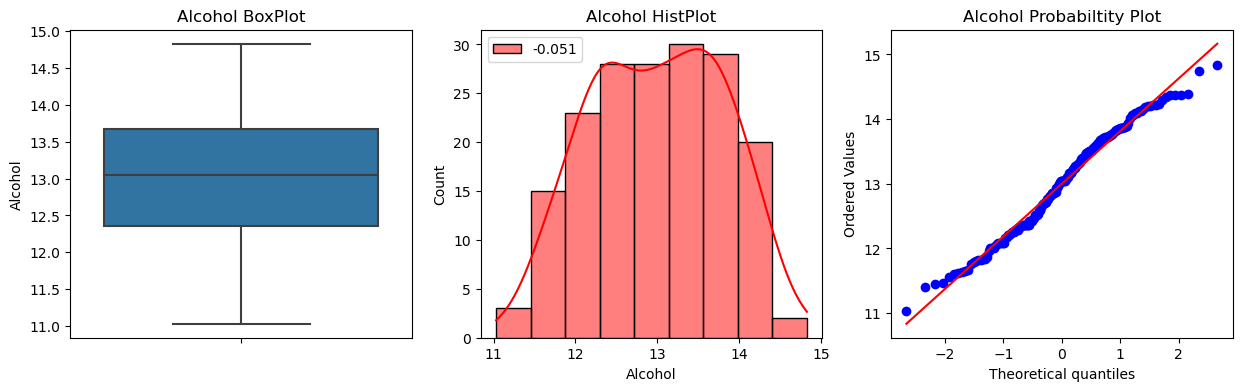

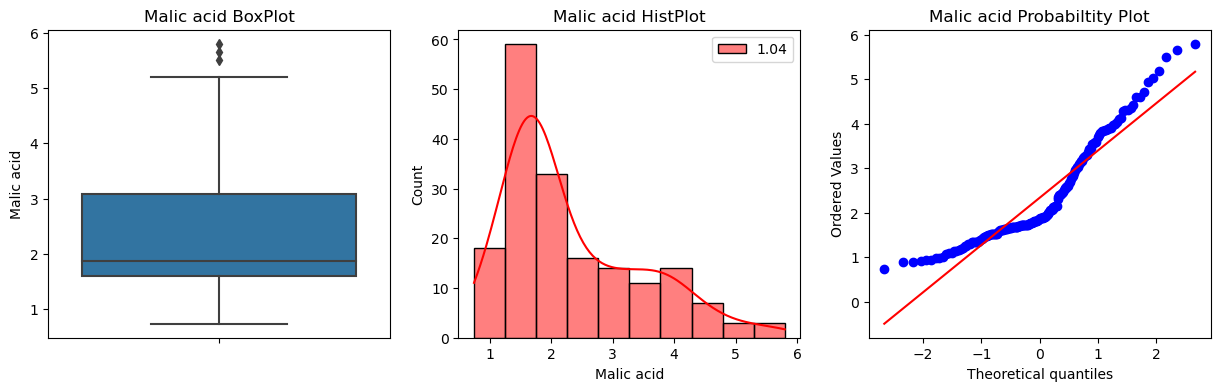

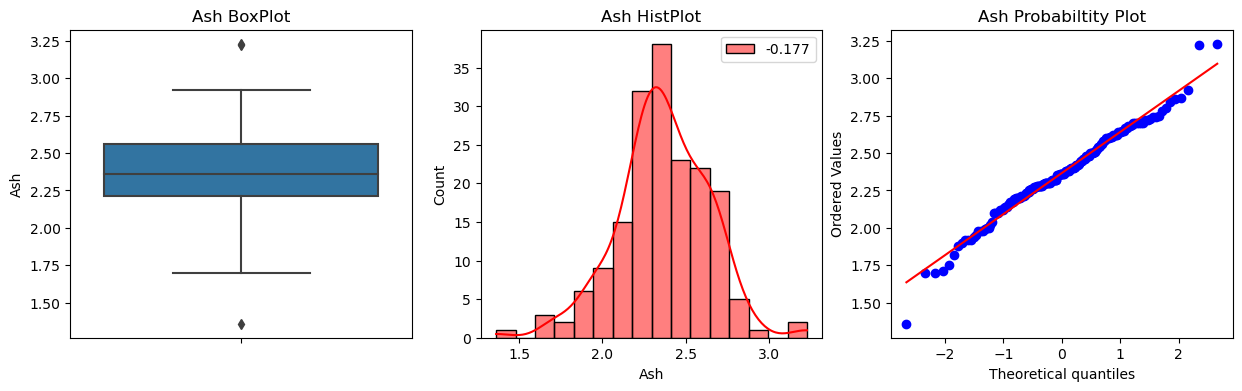

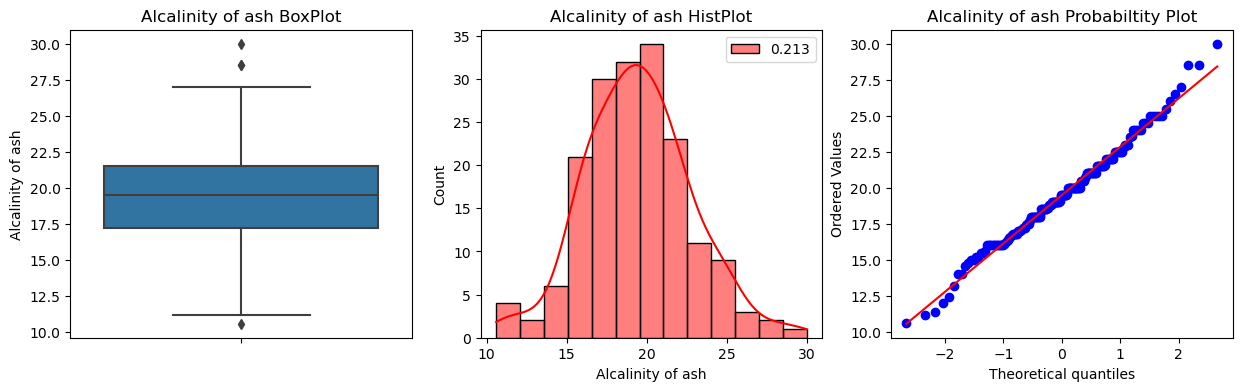

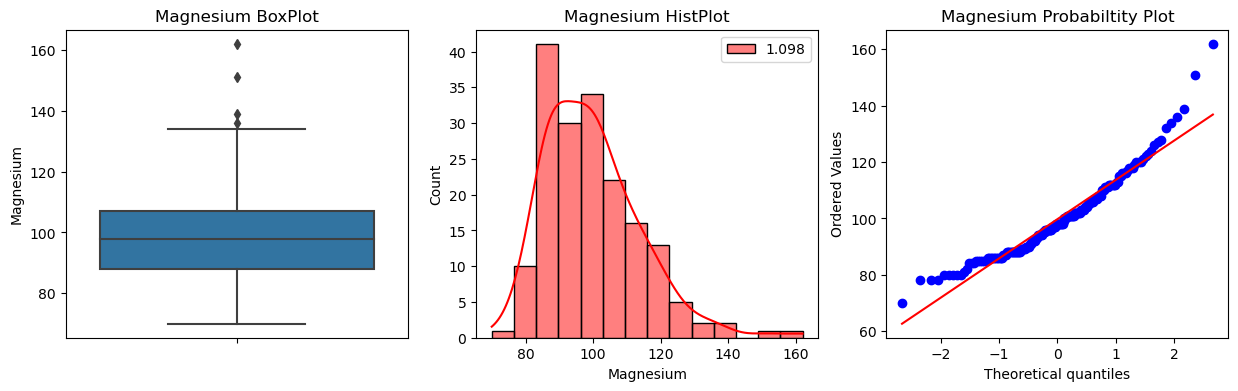

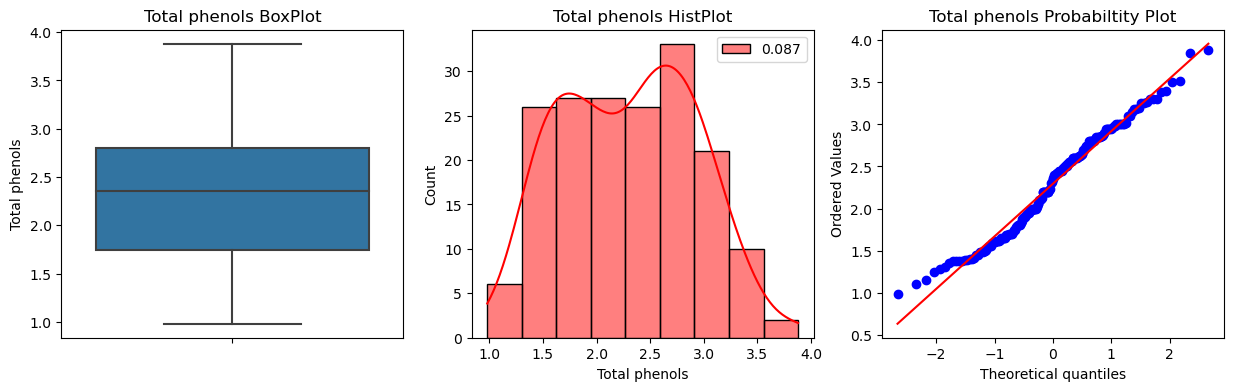

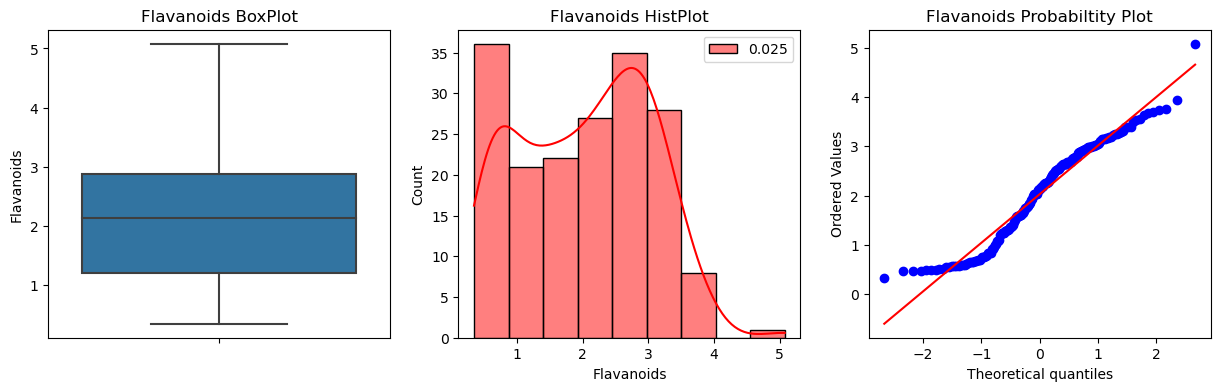

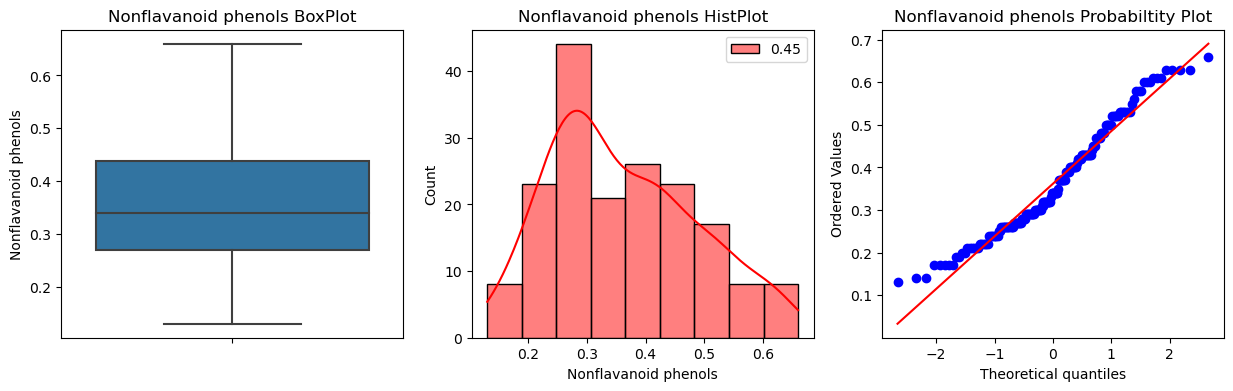

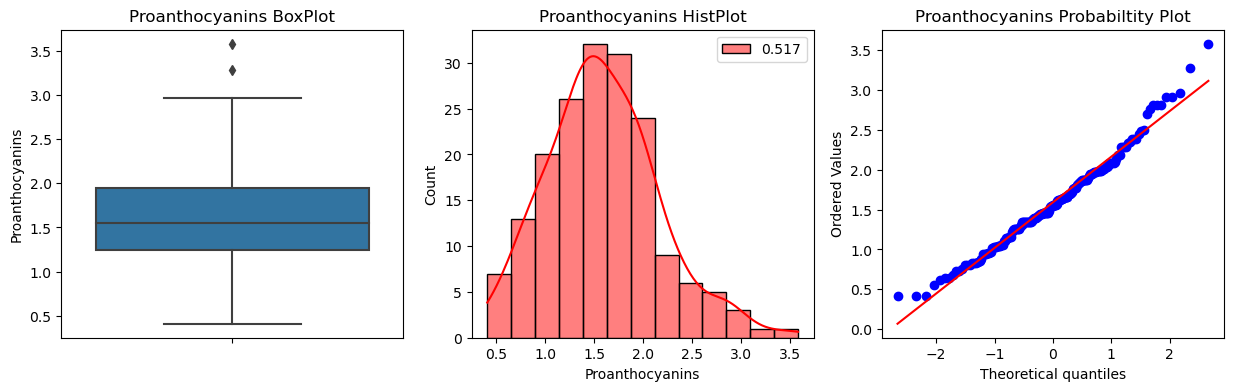

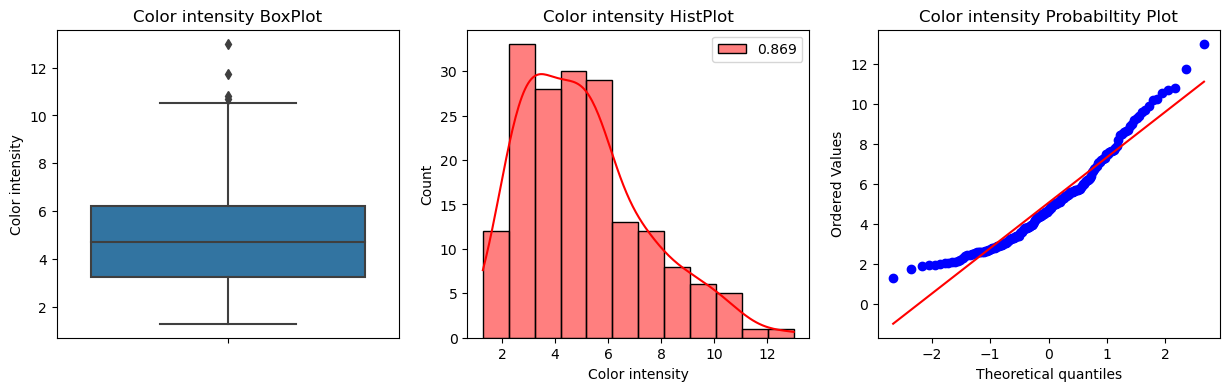

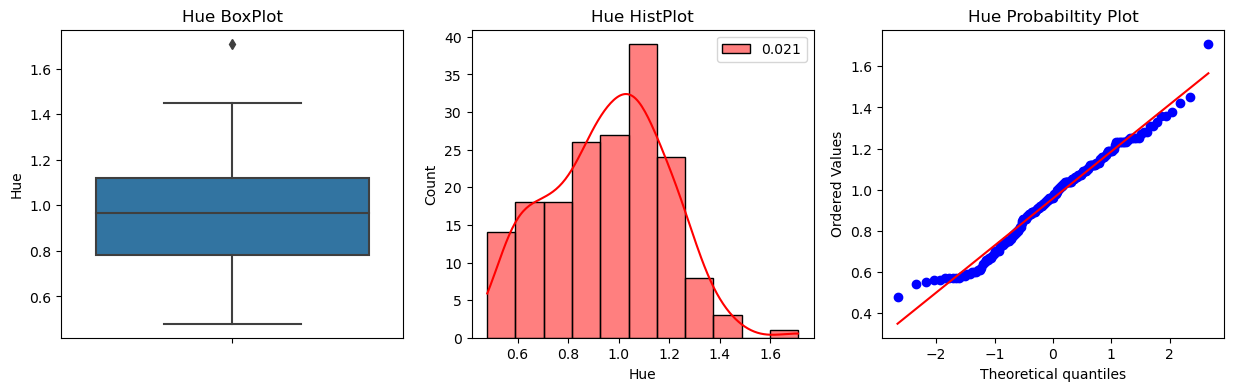

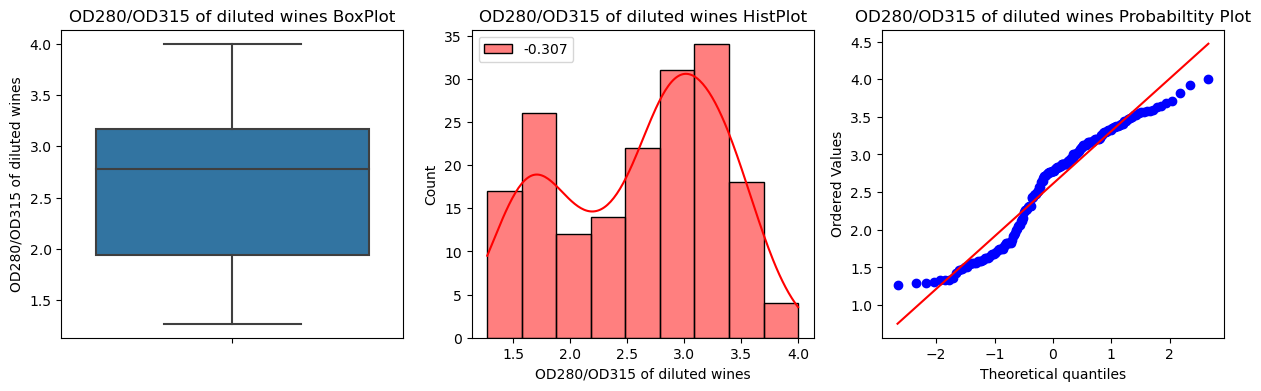

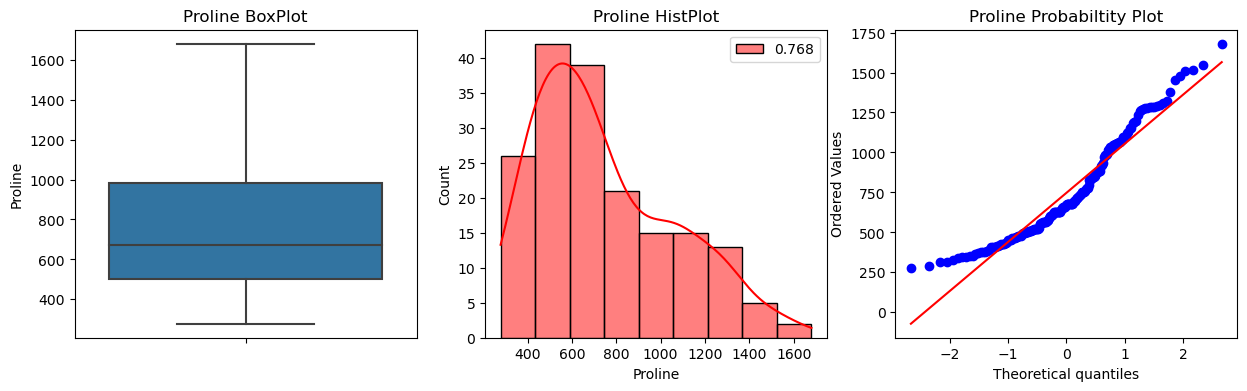

In [82]:
for cols in df:
    if cols != 'class':
        Check_skew(df,cols)

Inferences : 
    
1) Alcohol :  In alcohol boxplot we can see that there is no skewness in the datapoints. It is same with the histplot where the
    density curve is not having any skewness towards left or right. We can clearly see that the datapoints of the alcohol in the
    probplot lies with the straight line.
    
2) Malic Acid : The boxplot of the malic acid shows that the datapoints are right-skewed and there are some outliers too.And the
    same shows the kde of the histplot where the data is right-skewed. The probplot of shows that only some data points lie with 
    the normal line.

3) Ash : The datapoints are left-skewed in the both boxplot and histplot.The probplot also tells that the most of the datapoints
    are normal.
    
4) Alcalinity of Ash : same like ash these slightly left-skewed and there are some outliers but seems to be like normal in both 
    the box and histplot. The datapoints are normal in the probplot.
    
5) Total Phenols : The data points are right-skewed in both the box plot and hist plot.And we can see that some of the data
    points are out of the normal line.
    
6) Flavonoids : The data points are right-skewed in both the box and hist plots. We can see that only few points lie on the normal
    line.

7) Non-Flavonoids : The data points are right-skewed in both the hist and box plots and can see that few of the datapoints lie on
    the normal line.

8) Proanthocynanins : we can see that the datapoints are right-skewed and the most of the data points lie on the normal line of
    the probplot.
    
9) Colour Intensity : we can see that the datapoints are right-skewed and the most of the data points lie on the normal line of
    the probplot.

10) Hue : The datapoints are normal and few outliers in the datapoints. The most of the datapoints lie on the normal line.
    
11) Proline : We can see that the datapoints are right-skewed and  only few datapoints lie on the normal line.

In [83]:
from scipy import stats

for cols in df:
    if(cols != 'class'):
        df[cols], lam = stats.boxcox(df[cols])


In [84]:
df.skew(axis=0)

class                           0.107431
Alcohol                        -0.023100
Malic acid                      0.027055
Ash                             0.054520
Alcalinity of ash               0.017988
Magnesium                       0.006353
Total phenols                  -0.061031
Flavanoids                     -0.186089
Nonflavanoid phenols           -0.021171
Proanthocyanins                 0.004080
Color intensity                -0.007184
Hue                            -0.043357
OD280/OD315 of diluted wines   -0.173749
Proline                         0.012055
dtype: float64

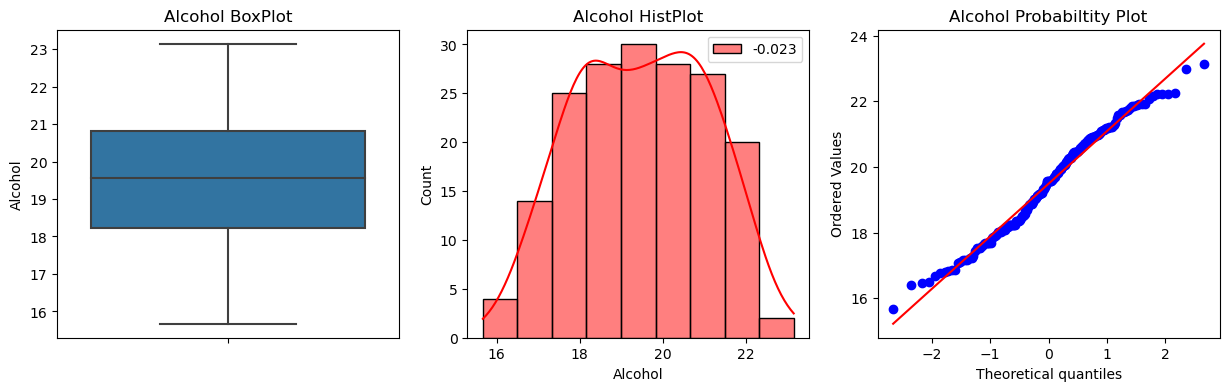

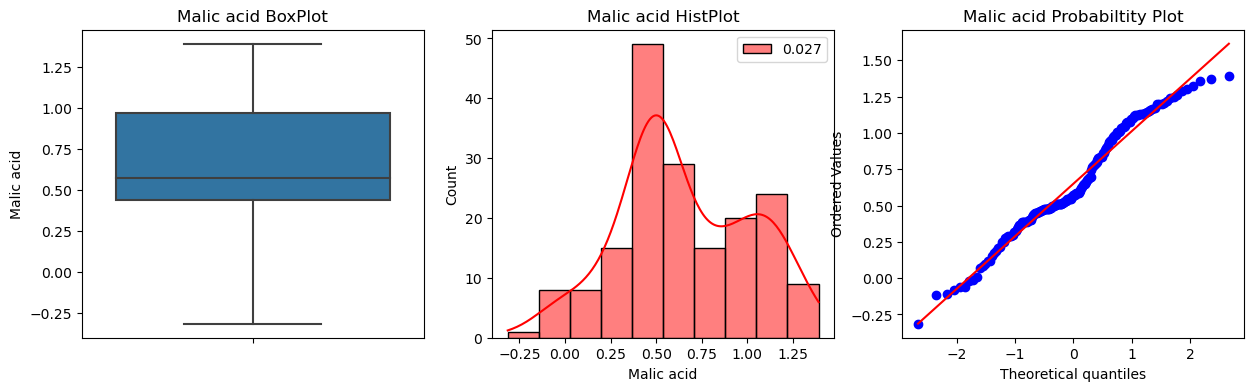

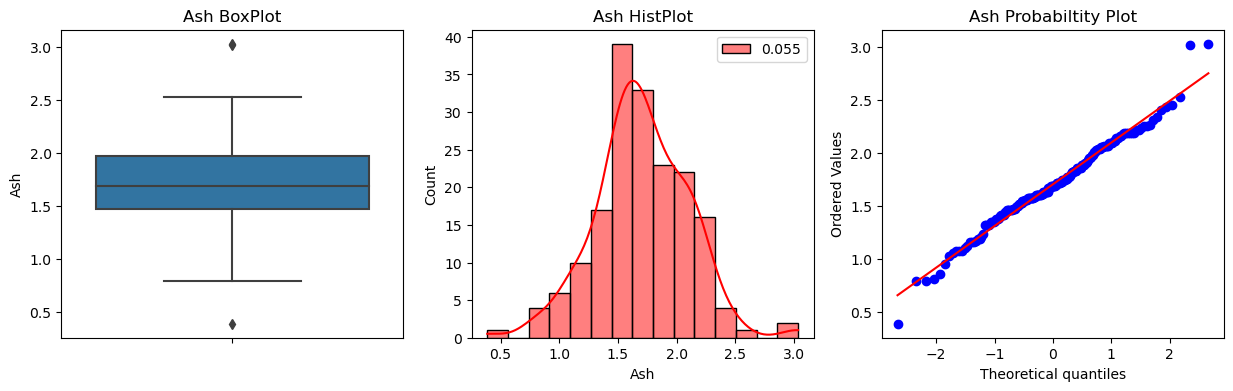

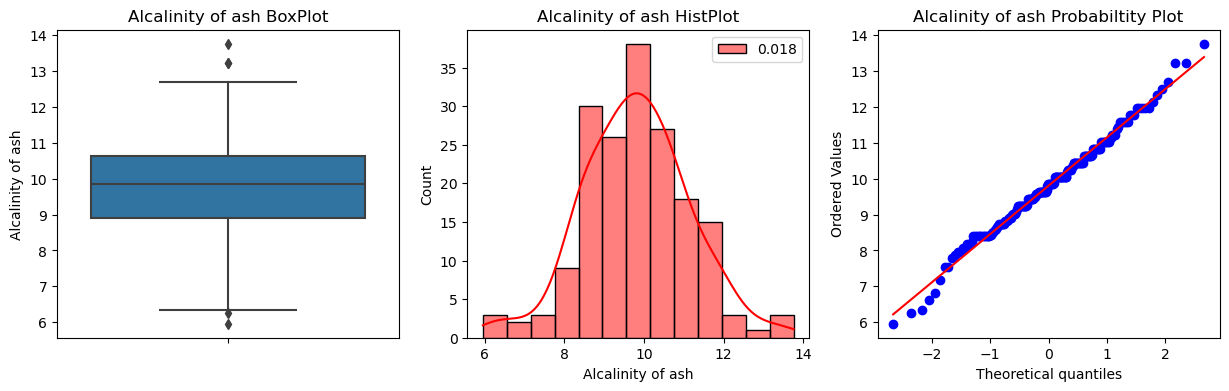

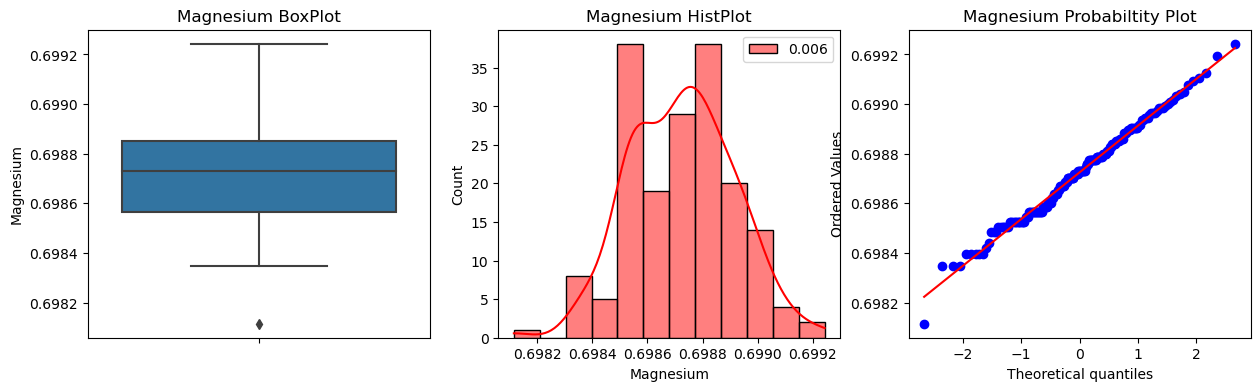

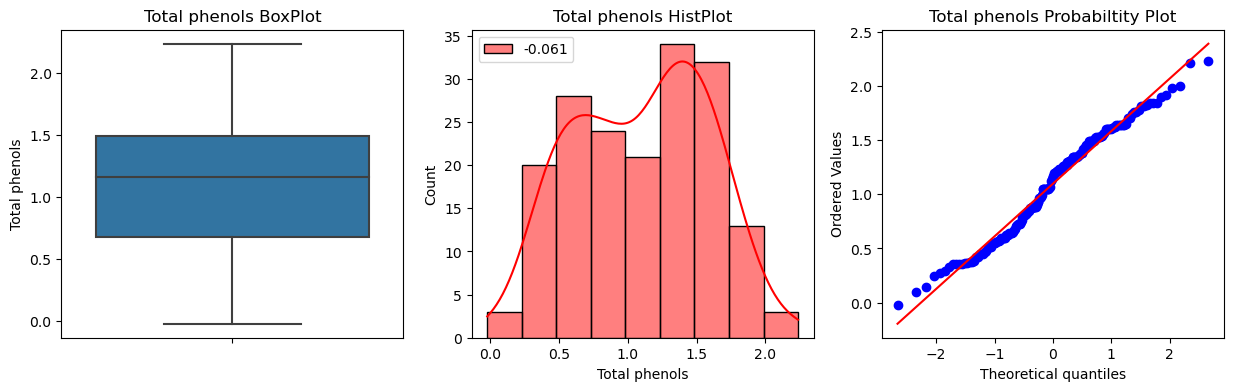

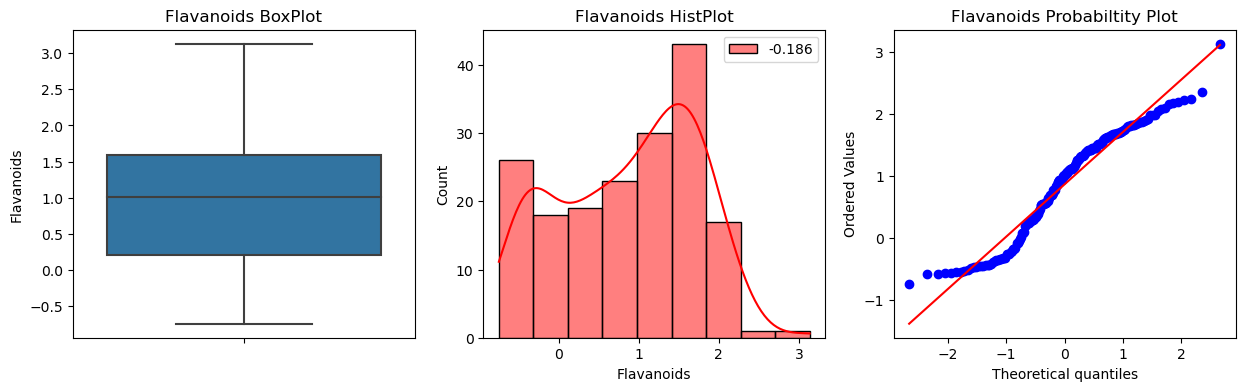

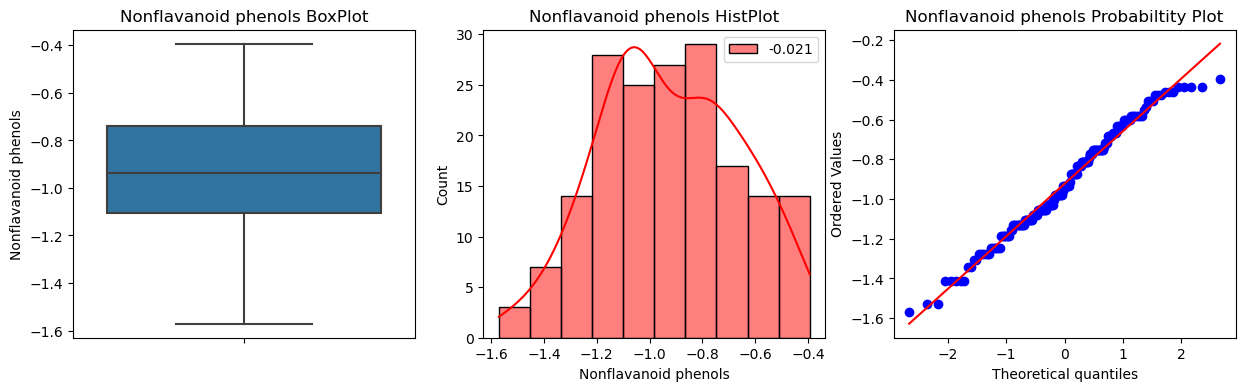

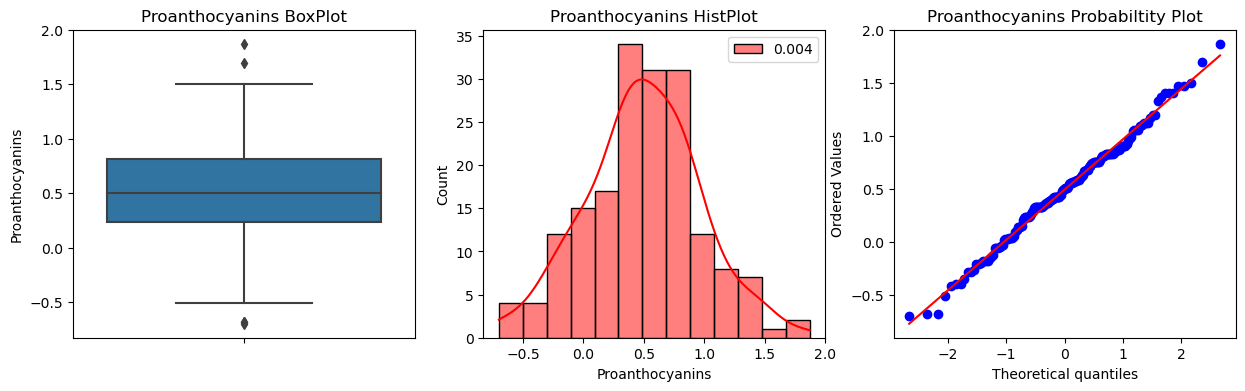

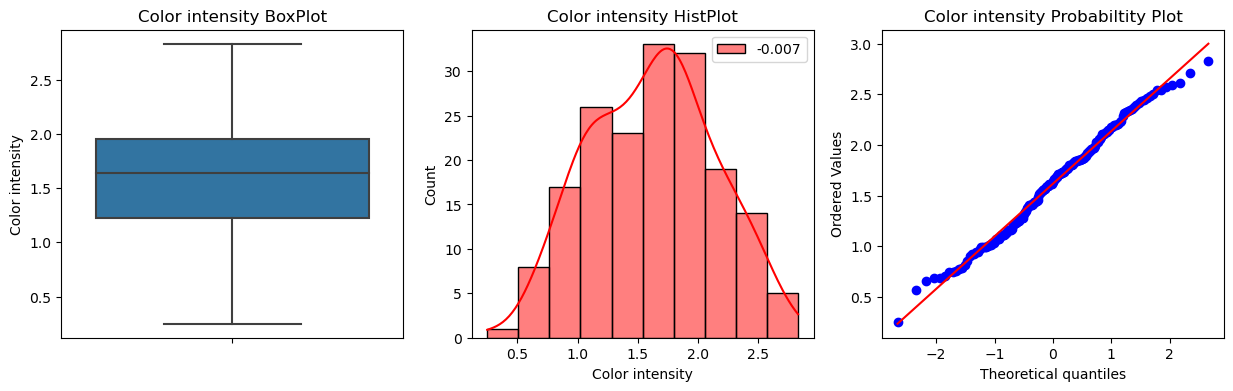

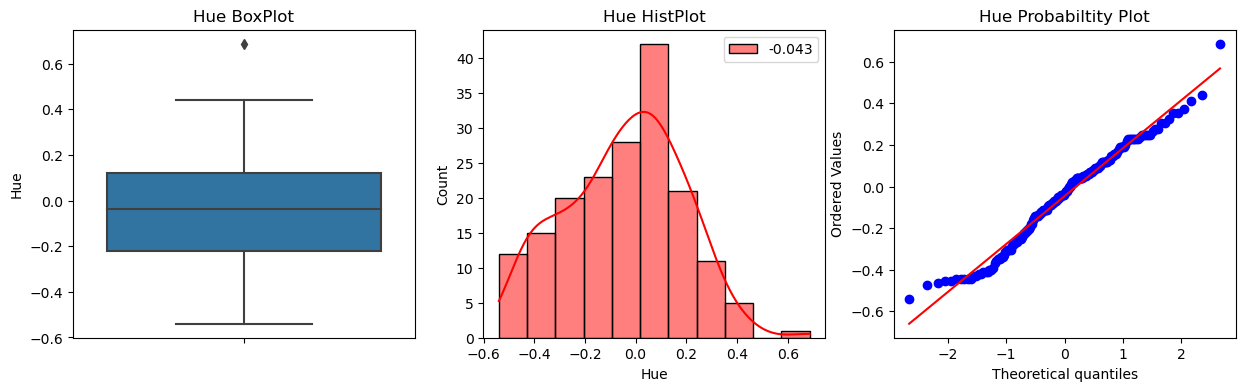

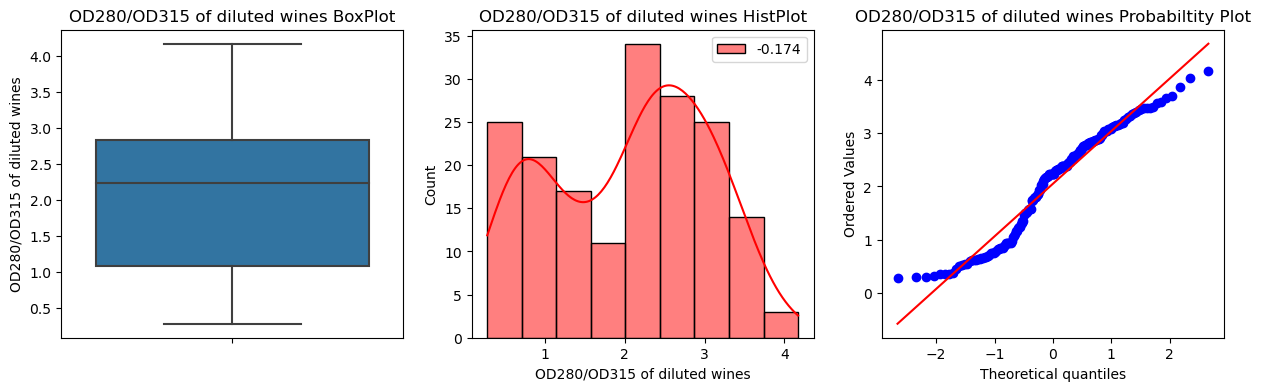

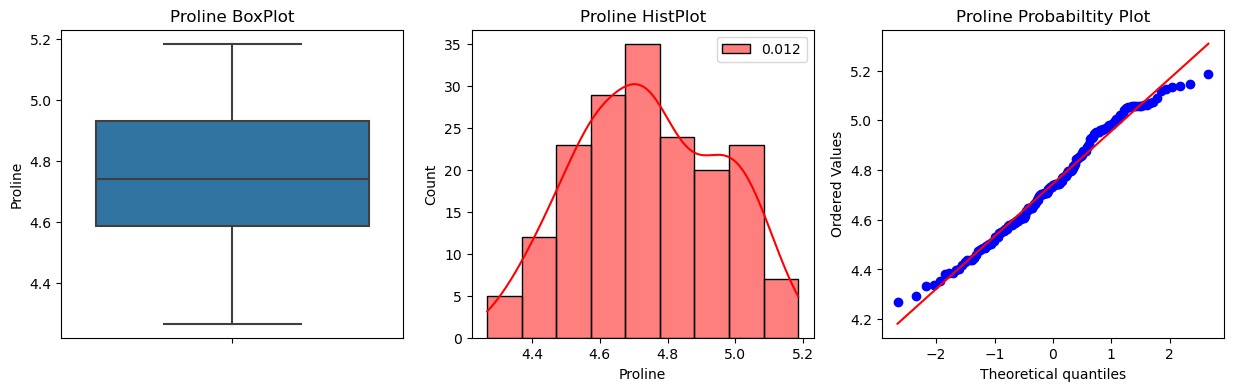

In [85]:
for cols in df:
    if cols != 'class':
        Check_skew(df,cols)